In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
wine_df=pd.read_csv('wine.csv',delimiter=',')

In [3]:
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
wine_df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.00000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1.937500,13.012386,2.333011,2.370568,19.497727,99.346591,2.28892,2.024773,0.362784,1.570000,5.084318,0.957477,2.610455,746.863636
std,0.779423,0.807021,1.116781,0.272476,3.358383,13.554094,0.62563,1.003512,0.124779,0.540359,2.318197,0.228827,0.713876,316.066745
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.98000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.367500,1.607500,2.217500,17.175000,88.000000,1.73500,1.175000,0.270000,1.247500,3.250000,0.787500,1.927500,500.000000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.33500,2.120000,0.340000,1.545000,4.750000,0.965000,2.780000,673.500000
75%,3.000000,13.682500,3.047500,2.560000,21.500000,107.000000,2.80000,2.882500,0.442500,1.950000,6.212500,1.120000,3.172500,986.250000
max,3.000000,14.830000,5.800000,3.230000,30.000000,151.000000,3.88000,5.080000,0.660000,2.960000,13.000000,1.710000,4.000000,1680.000000


# Check for Duplicate Values

In [4]:
wine_df[wine_df.duplicated()].shape #No duplicate Records

(0, 14)

# Check for Outliers

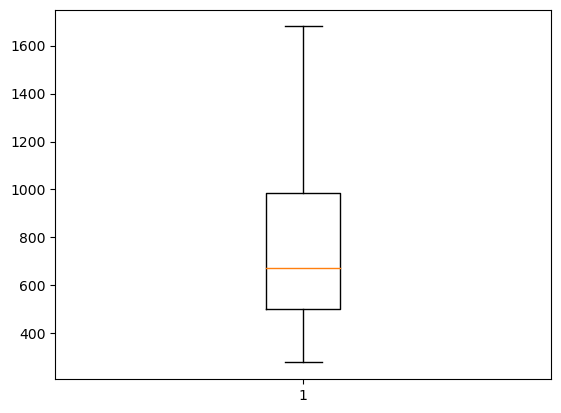

In [5]:
data_box=wine_df.dropna()
data_box1=data_box.Proline
plt.boxplot(data_box1)
plt.show()

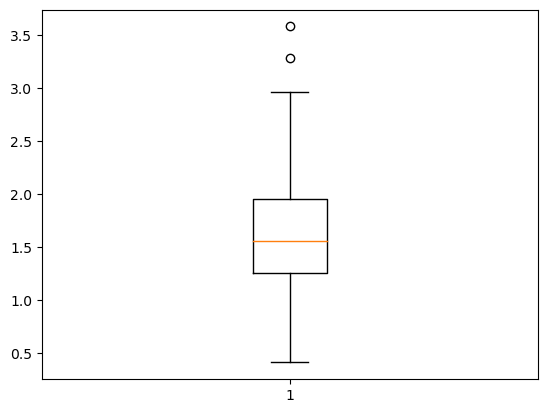

In [6]:
data_box=wine_df.dropna()
data_box1=data_box.Proanthocyanins
plt.boxplot(data_box1)
plt.show()

In [7]:
# Calculate IQR
Q1 = wine_df['Proanthocyanins'].quantile(0.25)
Q3 = wine_df['Proanthocyanins'].quantile(0.75)
IQR = Q3 - Q1

In [8]:
# Remove data points outside IQR range
wine_df = wine_df[~((wine_df['Proanthocyanins'] < (Q1 - 1.5 * IQR)) |(wine_df['Proanthocyanins'] > (Q3 + 1.5 * IQR)))]

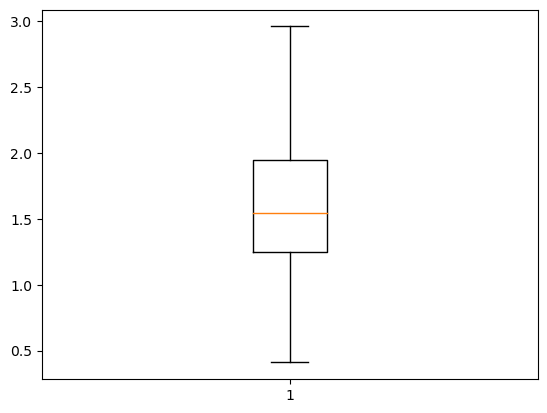

In [9]:
data_box=wine_df.dropna()
data_box1=data_box.Proanthocyanins
plt.boxplot(data_box1)
plt.show()

# Performing PCA 

In [10]:
wine1 = wine_df.values
wine1

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [11]:
# Normalizing the numerical data
wine_normal=scale(wine1)

In [12]:
wine_normal

array([[-1.20624477,  1.51307969, -0.55945495, ...,  0.36166298,
         1.83964908,  1.0094198 ],
       [-1.20624477,  0.23313995, -0.49659599, ...,  0.40548884,
         1.10915323,  0.96182607],
       [-1.20624477,  0.18343355,  0.02423539, ...,  0.31783711,
         0.78604929,  1.39016966],
       ...,
       [ 1.36707741,  0.32012615,  1.74836688, ..., -1.61050087,
        -1.47567824,  0.27964923],
       [ 1.36707741,  0.19586015,  0.23077198, ..., -1.566675  ,
        -1.39139026,  0.29551381],
       [ 1.36707741,  1.3888137 ,  1.58672956, ..., -1.52284914,
        -1.41948626, -0.59290253]])

# PCA Implementation

In [13]:
pca=PCA()
pca_values=pca.fit_transform(wine_normal)

In [14]:
pca_values

array([[ 3.58025860e+00, -1.48174217e+00, -1.75394576e-01, ...,
         5.40247741e-01, -3.06524802e-01,  2.24156321e-01],
       [ 2.50944091e+00,  4.04119197e-01, -2.01778548e+00, ...,
         4.35968175e-01, -1.07636123e-01,  1.25046741e-01],
       [ 2.85880967e+00, -1.02455353e+00,  1.00075799e+00, ...,
        -5.54277752e-02,  2.01770533e-03, -6.42357771e-02],
       ...,
       [-2.97589006e+00, -2.83738866e+00, -9.74571637e-01, ...,
         5.42684008e-01,  1.41709740e-01, -3.07444061e-02],
       [-2.69865696e+00, -2.36489372e+00, -5.72135296e-01, ...,
         2.38488353e-01, -1.46552285e-01,  1.15567531e-01],
       [-3.42791864e+00, -2.78592870e+00,  9.97486518e-01, ...,
        -1.17675569e-01, -1.51414541e-01, -2.61746141e-01]])

In [15]:
# PCA Components matrix or convariance Matrix
pca.components_

array([[-3.92920929e-01,  1.44347855e-01, -2.22181275e-01,
         8.83381417e-03, -2.22541600e-01,  1.22439719e-01,
         3.59085118e-01,  3.89610166e-01, -2.64748680e-01,
         2.87662243e-01, -8.24099269e-02,  2.74959249e-01,
         3.48740349e-01,  2.70600420e-01],
       [-1.42308411e-02, -4.72927662e-01, -2.33002696e-01,
        -3.14662712e-01,  2.15580705e-03, -3.25064458e-01,
        -6.55901115e-02,  5.61659222e-03, -2.55438349e-02,
        -5.33105857e-02, -5.25087940e-01,  2.85485595e-01,
         1.65464672e-01, -3.53180463e-01],
       [ 6.47963508e-05, -2.13625495e-01,  8.64327365e-02,
         6.29573501e-01,  6.06990536e-01,  1.15519845e-01,
         1.43954839e-01,  1.49937043e-01,  1.72281424e-01,
         1.48572620e-01, -1.41662674e-01,  8.77141120e-02,
         1.67897728e-01, -1.33558364e-01],
       [ 3.49374025e-02,  9.05444820e-02,  4.37408005e-01,
        -1.56392396e-01,  3.72662880e-02, -6.01457145e-01,
         2.18876243e-01,  1.72647587e-01,  1.

In [16]:
var = pca.explained_variance_ratio_
var

array([0.39916921, 0.18202269, 0.10474387, 0.06454118, 0.05862492,
       0.04902188, 0.03504951, 0.02551598, 0.02145148, 0.0188169 ,
       0.01601982, 0.01176825, 0.00920545, 0.00404885])

In [17]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.92, 58.12, 68.59, 75.04, 80.9 , 85.8 , 89.3 , 91.85, 94.  ,
       95.88, 97.48, 98.66, 99.58, 99.98])

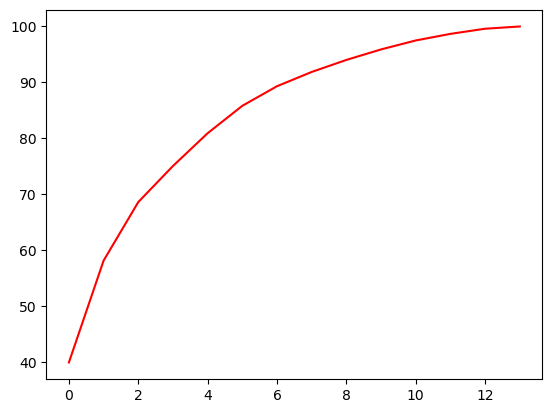

In [18]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [19]:
 pca_values[:,0:1]

array([[ 3.5802586 ],
       [ 2.50944091],
       [ 2.85880967],
       [ 3.98351982],
       [ 1.45070138],
       [ 3.33558764],
       [ 2.78873584],
       [ 2.40828374],
       [ 2.83253138],
       [ 3.03170985],
       [ 3.73120374],
       [ 2.12588463],
       [ 2.46243725],
       [ 3.74923512],
       [ 4.52602927],
       [ 2.63482932],
       [ 2.53705293],
       [ 2.26924786],
       [ 3.78757557],
       [ 2.41634256],
       [ 3.37914715],
       [ 1.5115089 ],
       [ 2.83767935],
       [ 2.0043084 ],
       [ 2.12912531],
       [ 1.45437501],
       [ 2.14250975],
       [ 1.62213058],
       [ 2.54309827],
       [ 2.58657672],
       [ 2.83776103],
       [ 2.97202789],
       [ 2.02350775],
       [ 2.27541889],
       [ 1.808289  ],
       [ 2.25348305],
       [ 1.78253572],
       [ 1.52996881],
       [ 1.85899136],
       [ 2.84572048],
       [ 2.89345464],
       [ 1.10506552],
       [ 3.32793751],
       [ 0.91982378],
       [ 2.41941717],
       [ 1

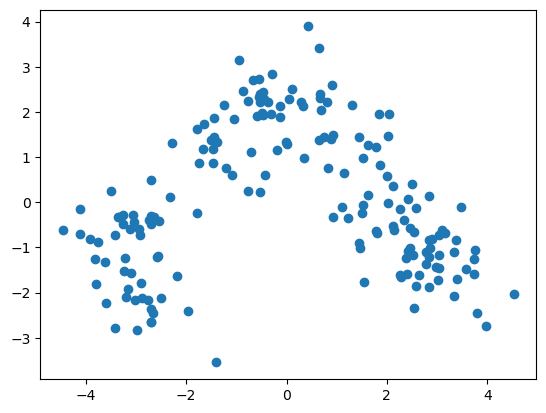

In [20]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z = pca_values[:2:3]
plt.scatter(x,y)

In [21]:
y

array([[-1.48174217],
       [ 0.4041192 ],
       [-1.02455353],
       [-2.73686347],
       [-0.9123269 ],
       [-2.08522491],
       [-1.09999618],
       [-1.599815  ],
       [-0.84623211],
       [-0.72853042],
       [-1.26441674],
       [-0.52487186],
       [-0.57782565],
       [-1.04690897],
       [-2.04046285],
       [-1.62212023],
       [-2.33544647],
       [-1.62017569],
       [-2.44906756],
       [-1.0778957 ],
       [-0.82962157],
       [-0.24838973],
       [ 0.13765345],
       [ 0.57471461],
       [ 0.35944509],
       [-1.0062554 ],
       [-0.60548063],
       [ 0.17040847],
       [-0.66835899],
       [-0.13453382],
       [-1.21154547],
       [-1.43018087],
       [-0.02097518],
       [-1.65512571],
       [-0.68019201],
       [-0.14893487],
       [-0.63510248],
       [-0.05708956],
       [ 0.83459795],
       [-1.86898017],
       [-0.80775516],
       [-0.1116274 ],
       [-1.10739999],
       [-0.3326866 ],
       [ 0.07296324],
       [-1

In [22]:
final_df=pd.concat([wine_df['Type'],pd.DataFrame(pca_values[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df

,Type,PC1,PC2,PC3
0,1.0,3.580259,-1.481742,-0.175395
1,1.0,2.509441,0.404119,-2.017785
2,1.0,2.858810,-1.024554,1.000758
3,1.0,3.983520,-2.736863,-0.201168
4,1.0,1.450701,-0.912327,2.031622
...,...,...,...,...
175,3.0,-3.427919,-2.785929,0.997487
176,3.0,NaN,NaN,NaN
177,3.0,NaN,NaN,NaN
95,NaN,-0.535826,0.236170,1.317040


<AxesSubplot:>

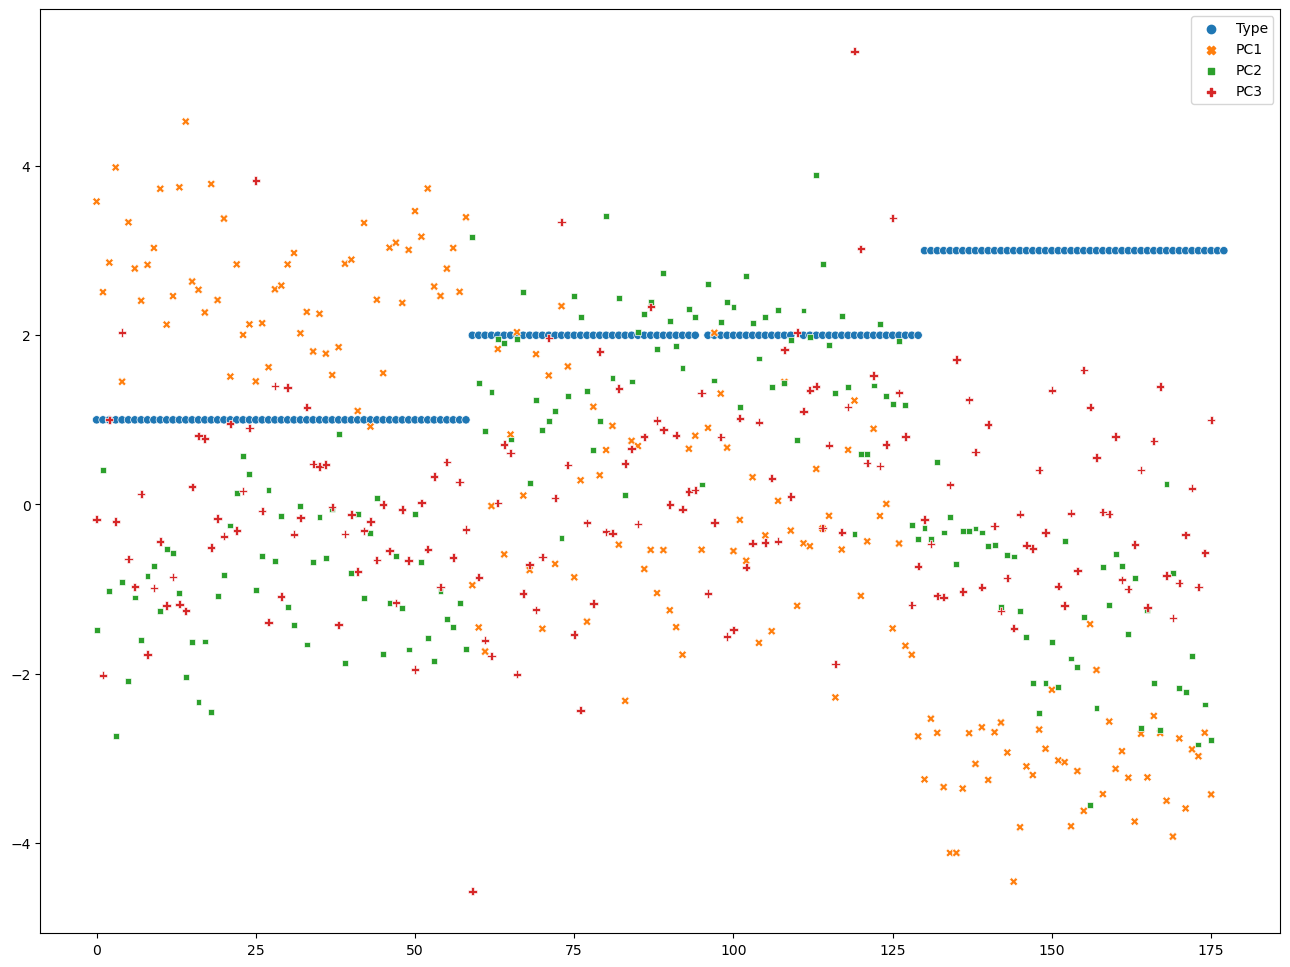

In [23]:
# Visualization of PCAs
import seaborn as sns
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=final_df)

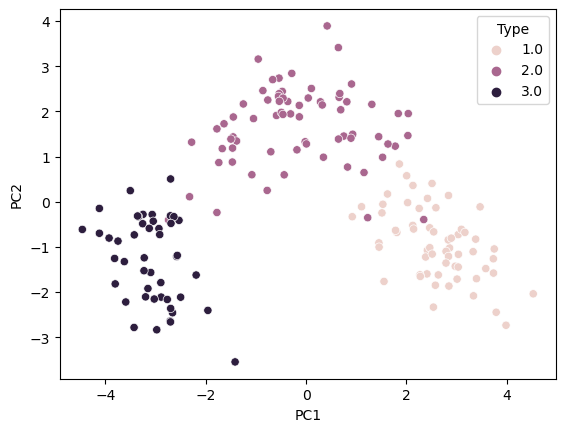

In [24]:
sns.scatterplot(data=final_df, x='PC1', y='PC2', hue='Type');

# Hierarchical Clustering

In [25]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

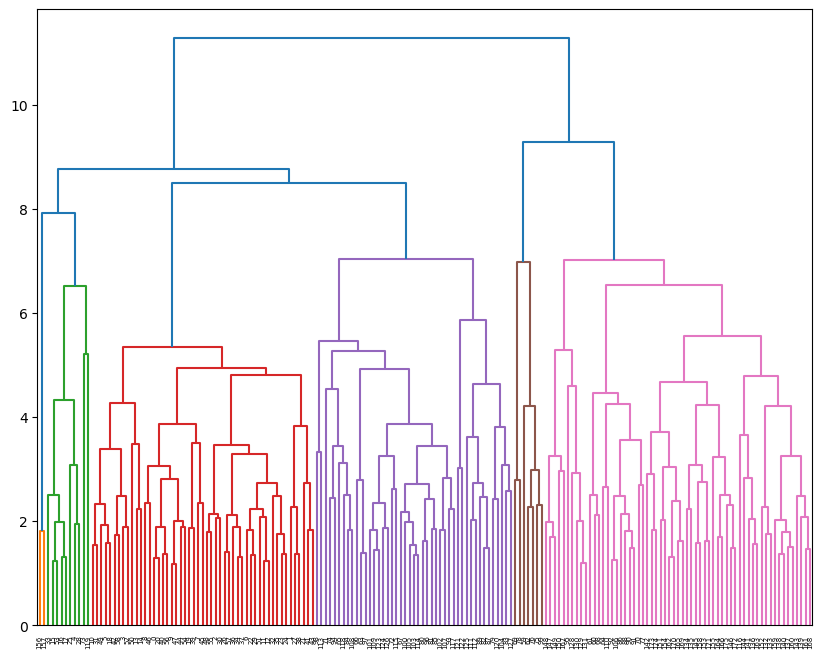

In [26]:
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(wine_normal,'complete'))

In [27]:
# Create Clusters
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=3)

In [28]:
y=pd.DataFrame(hclusters.fit_predict(wine_normal),columns=['clustersid'])
y['clustersid'].value_counts()

1    62
2    59
0    55
Name: clustersid, dtype: int64

In [29]:
# Adding clusters to dataset
wine2=wine_df.copy()
wine2['clustersid']=hclusters.labels_
wine2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


# K-Means Clustering

In [30]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

<AxesSubplot:xlabel='X', ylabel='Y'>

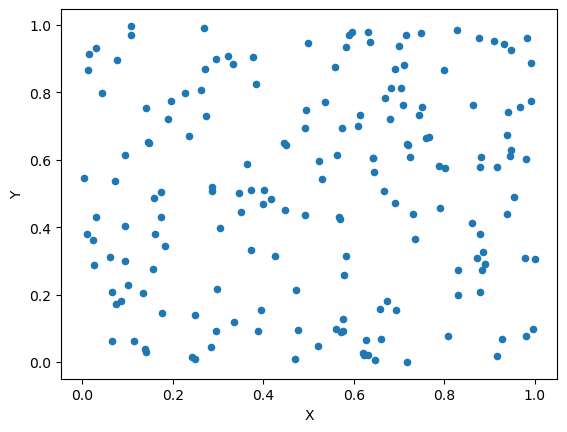

In [31]:
X = np.random.uniform(0,1,177)
Y = np.random.uniform(0,1,177)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

# Build Cluster algorithm using
3 principal component scores

In [32]:
# Cluster algorithm using 3 cluster
clusters3=KMeans(3,random_state=30).fit(wine_normal)
clusters3

KMeans(n_clusters=3, random_state=30)

In [33]:
clusters3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
# Assign clusters to the data set
wine3=wine_df.copy()
wine3['clusters3id']=clusters3.labels_
wine3

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters3id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [35]:
wine3['clusters3id'].value_counts()

2    66
0    61
1    49
Name: clusters3id, dtype: int64